In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv("Iris.csv")

In [32]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
colname=df.select_dtypes("float64").columns#to  get aal the columns of float

In [35]:
from scipy.stats import skew #import skew to check skewness

SepalLengthCm
0.3117530585022963


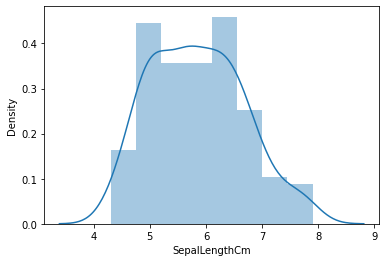

SepalWidthCm
0.330702812773315


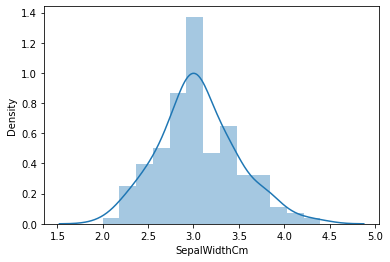

PetalLengthCm
-0.2717119501716388


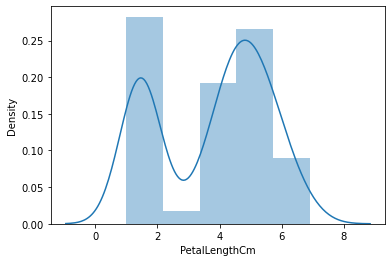

PetalWidthCm
-0.10394366626751729


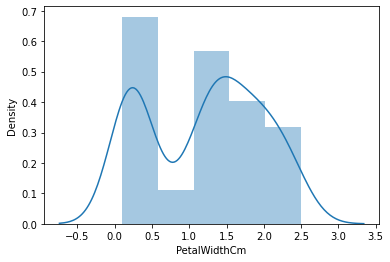

In [36]:
for col in df[colname]: # plot a graph 
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    
    plt.show()

In [37]:
df["Species"].unique() # to check categories

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

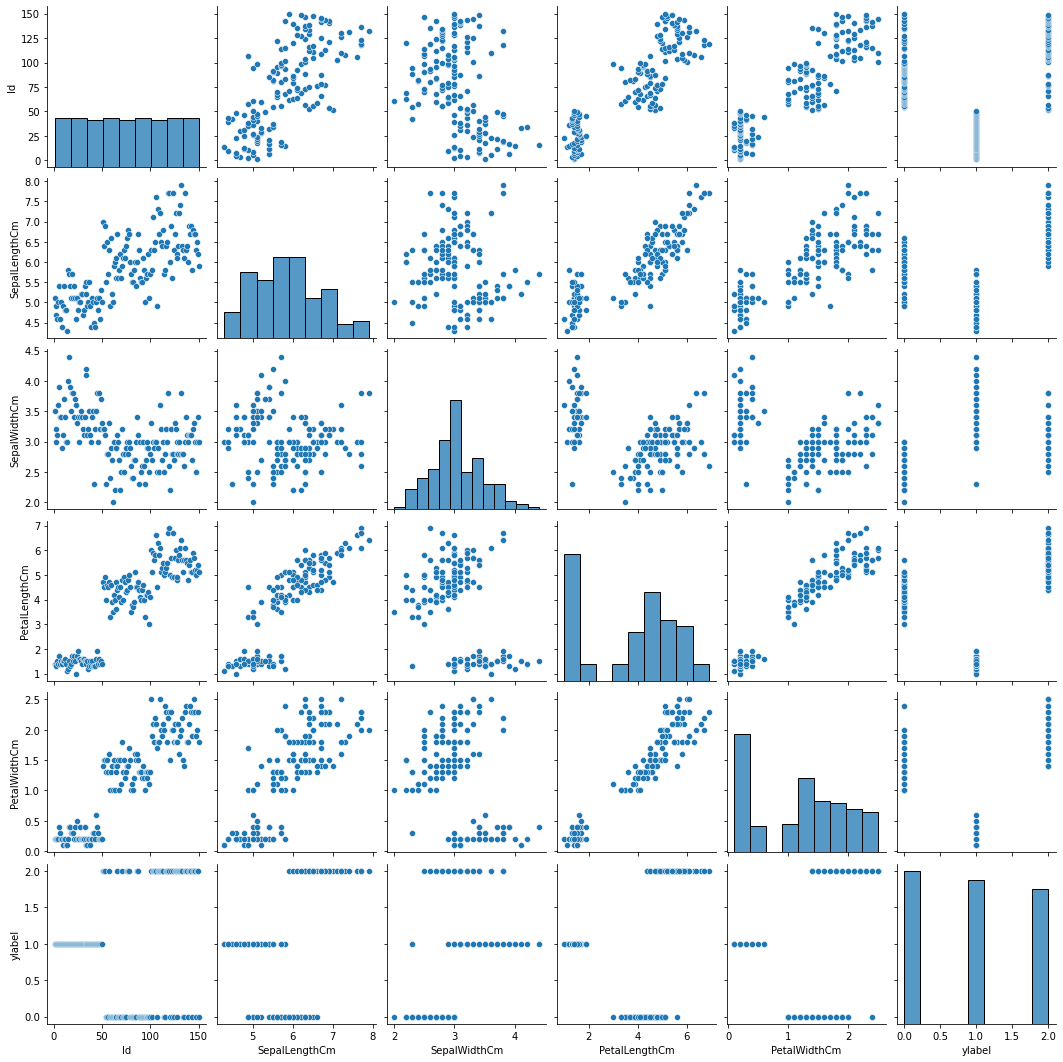

In [55]:
sns.pairplot(df) # to check correlatio

In [56]:
x=df.iloc[:,1:5].values #selecting x features

In [40]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
from sklearn.preprocessing import StandardScaler #scalling data
sc = StandardScaler()
x = sc.fit_transform(x)

In [42]:
from sklearn.cluster import KMeans #import kmeans

In [43]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [44]:
wcss #getting inertia values

[600.0,
 223.73200573676348,
 140.96581663074699,
 114.68221609937967,
 91.13730688271085,
 80.535209394668,
 70.88546993521877,
 65.05566506315428,
 54.20074814257283,
 48.045500936138865]

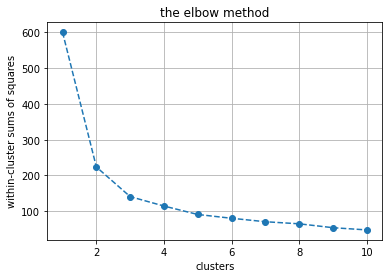

In [45]:
plt.plot(range(1,11),wcss,"o--")#applying elbow method
plt.title("the elbow method")
plt.xlabel("clusters")
plt.ylabel("within-cluster sums of squares")
plt.grid()
plt.show()

In [46]:
#'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
#elbow shows 3

In [47]:
kmeans = KMeans(n_clusters=3,random_state=0)
ylabel = kmeans.fit_predict(x)

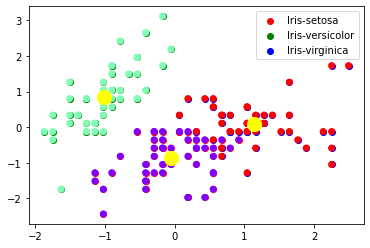

In [48]:
#plotting a scatter plot
plt.scatter(x[ylabel == 0,0],x[ylabel == 0,1],c = 'red', label = 'Iris-setosa')
plt.scatter(x[ylabel == 1,0],x[ylabel == 1,1],c = 'green', label = 'Iris-versicolor')
plt.scatter(x[ylabel == 2,0],x[ylabel == 2,1],c = 'blue', label = 'Iris-virginica')

plt.scatter(x[:,0],x[:,1], c=ylabel, cmap="rainbow")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c="yellow", s=200)

plt.legend()

In [49]:
ylabel

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [50]:
df["ylabel"]=ylabel#creating y label

In [51]:
x=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [52]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [53]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: ylabel, Length: 150, dtype: int32

In [54]:
#applying classification algorithm

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1) #splitting data

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report 

In [60]:
#creating  a model
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")
    print(classification_report(ytest,ypred))
    
    return model

In [61]:
gnb=mymodel(GaussianNB())#applying gausian algo

Training Accuracy:- 0.9904761904761905
 Testing Accuracy:- 0.9555555555555556
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       1.00      1.00      1.00        14
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [62]:
knb=mymodel(MultinomialNB())#applying multinomial

Training Accuracy:- 0.7428571428571429
 Testing Accuracy:- 0.6666666666666666
              precision    recall  f1-score   support

           0       0.53      0.94      0.68        17
           1       1.00      1.00      1.00        14
           2       0.00      0.00      0.00        14

    accuracy                           0.67        45
   macro avg       0.51      0.65      0.56        45
weighted avg       0.51      0.67      0.57        45



In [64]:
bnb=mymodel(BernoulliNB())#applying bernouli algo

Training Accuracy:- 0.34285714285714286
 Testing Accuracy:- 0.37777777777777777
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        17
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        14

    accuracy                           0.38        45
   macro avg       0.13      0.33      0.18        45
weighted avg       0.14      0.38      0.21        45

